## Colab commands

The following cells will download prerequisite for fewshot-face-translation-GAN.

In [2]:
# There are import errors under keras == 2.2.5
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 14.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 46.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 48.6MB/s eta 0:00:01
  Found existing installation: Keras 2.0.9
    Uninstalling Keras-2.0.9:
      Successfully uninstalled Keras-2.0.9
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install intel-tensorflow==1.15.0

     |████████████████████████████████| 155.9MB 60.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 48.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 58.9MB/s eta 0:00:01
     |████████████████████████████████| 512kB 57.2MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 52.5MB/s eta 0:00:01
  Found existing installation: tensorboard 1.9.0
    Uninstalling tensorboard-1.9.0:
      Successfully uninstalled tensorboard-1.9.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!pip install gdown

     |████████████████████████████████| 61kB 29.3MB/s eta 0:00:01
  Created wheel for gdown: filename=gdown-3.10.1-cp36-none-any.whl size=8974 sha256=04d1cf99b826ef7ec52ab4fc75dba38bda62916ce29c7f289caa282686f05989
  Stored in directory: /tmp/pip-ephem-wheel-cache-iy3z3trn/wheels/6c/eb/7c/a2e1b8793fb0e9496d17d260c61deea246d45546797f74bf65
Successfully built gdown
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
# Download pre-trined weights
!gdown https://drive.google.com/uc?id=1DUMmZGTGKMyEYSKy-w34IDHawVF24rIs
!gdown https://drive.google.com/uc?id=1xl8cg7xaRnMsyiODcXguJ83d5hwodckB

Downloading...
From: https://drive.google.com/uc?id=1DUMmZGTGKMyEYSKy-w34IDHawVF24rIs
To: /opt/app-root/src/fewshot-face-translation-GAN/encoder.h5
6.26MB [00:00, 97.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xl8cg7xaRnMsyiODcXguJ83d5hwodckB
To: /opt/app-root/src/fewshot-face-translation-GAN/decoder.h5
124MB [00:01, 90.6MB/s] 


In [44]:
!mkdir weights
!mv decoder.h5 weights/decoder.h5
!mv encoder.h5 weights/encoder.h5

mkdir: cannot create directory ‘weights’: File exists


In [45]:
!ls

colab_demo.ipynb	      images	   README.md	will.jpg
eric.jpg		      models.py    saved_model
face_toolbox_keras	      networks	   utils
fewshot-face-translation-GAN  __pycache__  weights


## Load GAN model

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
!pip install opencv-python

     |████████████████████████████████| 28.2MB 36.9MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [47]:
from models import FaceTranslationGANInferenceModel

In [17]:
model = FaceTranslationGANInferenceModel()

W0313 16:43:55.315227 139808772114240 module_wrapper.py:139] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0313 16:43:55.317163 139808772114240 module_wrapper.py:139] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0313 16:43:55.330025 139808772114240 module_wrapper.py:139] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0313 16:43:55.467136 139808772114240 module_wrapper.py:139] From /opt/app-root/src/fewshot-face-translation-GAN/fewshot-face-translation-GAN/networks/nn_blocks.py:141: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.

W0313 16:43:55.481770 1398

Found checkpoints in weights folder. Built model with pre-trained weights.


## Load face-toolbox

In [30]:
from face_toolbox_keras.models.verifier.face_verifier import FaceVerifier
fv = FaceVerifier(classes=512)

from face_toolbox_keras.models.parser import face_parser
fp = face_parser.FaceParser()

from face_toolbox_keras.models.detector import face_detector
fd = face_detector.FaceAlignmentDetector()

from face_toolbox_keras.models.detector.iris_detector import IrisDetector
idet = IrisDetector()
#idet.set_detector(fd)

W0313 16:47:55.051085 139808772114240 module_wrapper.py:139] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0313 16:47:55.107381 139808772114240 module_wrapper.py:139] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0313 16:47:55.285727 139808772114240 module_wrapper.py:139] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0313 16:48:05.032189 139808772114240 deprecation.py:506] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future ve

# Translate faces

In [49]:
import numpy as np
from utils import utils
from matplotlib import pyplot as plt

### Set path to input images

In [101]:
# We can also manually assign filenmes
fn_src = "trump.jpg"
fns_tar = ["eric.jpg"]

### Inferece

It requires additional time to load models for the first infernce.

In [102]:
src, mask, aligned_im, (x0, y0, x1, y1), landmarks = utils.get_src_inputs(fn_src, fd, fp, idet)
tar, emb_tar = utils.get_tar_inputs(fns_tar, fd, fv)

In [103]:
out = model.inference(src, mask, tar, emb_tar)

### Visualize results

Images are resized to having maximum side length of 768.

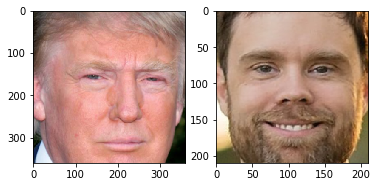

In [104]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(tar)

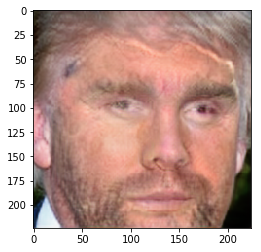

In [105]:
result_face = np.squeeze(((out[0] + 1) * 255 / 2).astype(np.uint8))
plt.imshow(result_face)

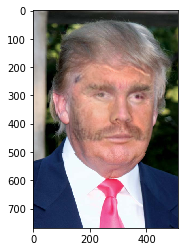

In [106]:
result_img = utils.post_process_result(fn_src, fd, result_face, aligned_im, src, x0, y0, x1, y1, landmarks)
plt.imshow(result_img)